<a href="https://colab.research.google.com/github/reethikprasad/portfo/blob/master/Sffood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SFF**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
#unzipping the data
#!unzip "/content/drive/My Drive/Food/Food dataset.zip" -d "/content/drive/My Drive/Food"

Archive:  /content/drive/My Drive/Food/Food dataset.zip
   creating: /content/drive/My Drive/Food/Food dataset/
   creating: /content/drive/My Drive/Food/Food dataset/test/
  inflating: /content/drive/My Drive/Food/Food dataset/test/-chilling-1-e1549147195343.jpg  
  inflating: /content/drive/My Drive/Food/Food dataset/test/5e67b51bf0b61066ae625c16.jpg  
  inflating: /content/drive/My Drive/Food/Food dataset/test/6e8cd80ed157.jpg  
  inflating: /content/drive/My Drive/Food/Food dataset/test/b5.jpg  
  inflating: /content/drive/My Drive/Food/Food dataset/test/b6.jpg  
  inflating: /content/drive/My Drive/Food/Food dataset/test/Basic-Hot-Dogs-600x500.jpg  
  inflating: /content/drive/My Drive/Food/Food dataset/test/ca7.jpg  
  inflating: /content/drive/My Drive/Food/Food dataset/test/ca8.jpg  
  inflating: /content/drive/My Drive/Food/Food dataset/test/chi1.jpg  
  inflating: /content/drive/My Drive/Food/Food dataset/test/d4.jpg  
  inflating: /content/drive/My Drive/Food/Food dataset/te

# **Get our colab ready**

In [0]:
# import Tensorflow into colab
import tensorflow as tf
import tensorflow_hub as hub 
print("TF version", tf.__version__)
print("TF Hub version:", hub.__version__)

# Check for GPU availability
print("GPU", "available (YESSSS!!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

TF version 2.2.0-rc3
TF Hub version: 0.8.0
GPU available (YESSSS!!!!!)


# **Getting our data ready (turning into Tensors)**

In [0]:
# Checkout the labels of our data
import pandas as pd
labels_csv = pd.read_csv("/content/drive/My Drive/Food/Food dataset/train-label.csv")
print(labels_csv.describe())
print(labels_csv.head())

             id        name
count       240         240
unique      240          30
top     sm6.jpg  Fried fish
freq          1           8
                                  id    name
0  photo-1542820242-dd9053219a22.jpg  Burger
1  photo-1548946522-4a313e8972a4.jpg  Burger
2  photo-1549892898-79ac97b31fb2.jpg  Burger
3  photo-1551987840-f62d9c74ae78.jpg  Burger
4  photo-1559067933-0293effe6133.jpg  Burger


In [0]:
labels_csv.head()

,id,name
0,photo-1542820242-dd9053219a22.jpg,Burger
1,photo-1548946522-4a313e8972a4.jpg,Burger
2,photo-1549892898-79ac97b31fb2.jpg,Burger
3,photo-1551987840-f62d9c74ae78.jpg,Burger
4,photo-1559067933-0293effe6133.jpg,Burger


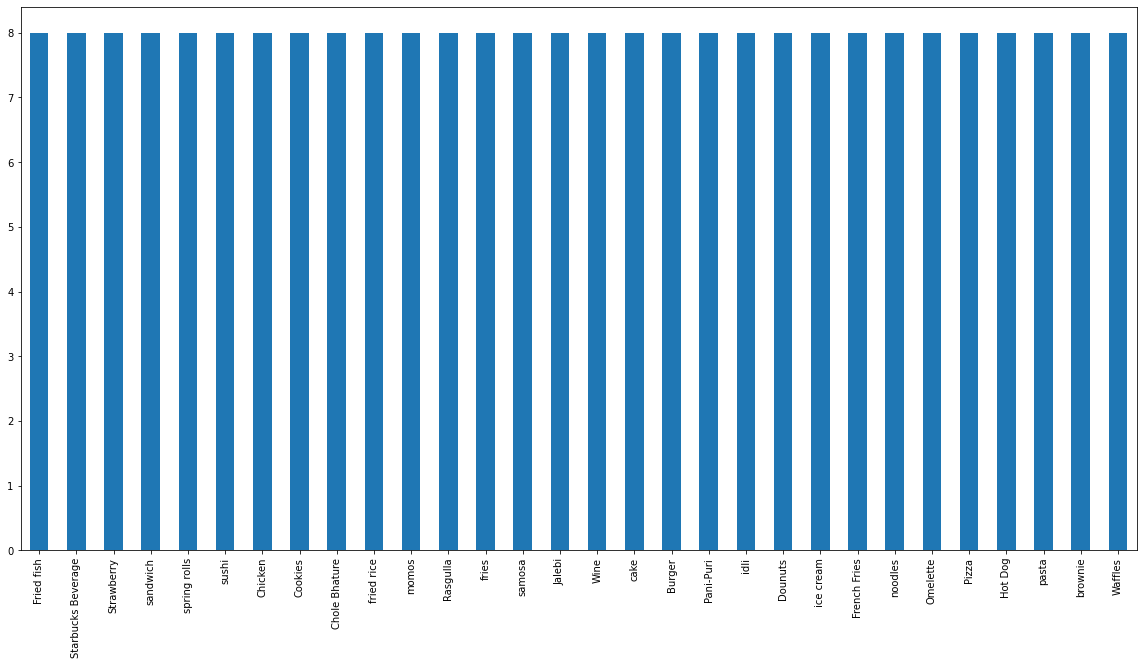

In [0]:
# Checking how many images are there of each food?
labels_csv["name"].value_counts().plot.bar(figsize=(20, 10))

# **Getting images and their labels**

In [0]:
# Create pathnames from image ID's
filenames = ["/content/drive/My Drive/Food/Food dataset/train/" + fname + "" for fname in labels_csv["id"]]

# Check the first 10
filenames[:10]

['/content/drive/My Drive/Food/Food dataset/train/photo-1542820242-dd9053219a22.jpg',
 '/content/drive/My Drive/Food/Food dataset/train/photo-1548946522-4a313e8972a4.jpg',
 '/content/drive/My Drive/Food/Food dataset/train/photo-1549892898-79ac97b31fb2.jpg',
 '/content/drive/My Drive/Food/Food dataset/train/photo-1551987840-f62d9c74ae78.jpg',
 '/content/drive/My Drive/Food/Food dataset/train/photo-1559067933-0293effe6133.jpg',
 '/content/drive/My Drive/Food/Food dataset/train/photo-1560130803-aaadb4bc913e.jpg',
 '/content/drive/My Drive/Food/Food dataset/train/photo-1565169609627-4b848c72c614.jpg',
 '/content/drive/My Drive/Food/Food dataset/train/photo-1583812323897-998e6927b5ea.jpg',
 '/content/drive/My Drive/Food/Food dataset/train/1f035a2bc93f5a63b9b70545a57bc8d5.jpg',
 '/content/drive/My Drive/Food/Food dataset/train/5926b90aec07f20b008f2163.jpg']

In [0]:
# Check whether number of filenames matches number of actual image files
import os
if len(os.listdir("/content/drive/My Drive/Food/Food dataset/train/")) == len(filenames):
  print("Filenames match actual amount of files!!! Proceed.")
else:
  print("Filenames do no match actual amount of files, check the target directory.")

Filenames match actual amount of files!!! Proceed.


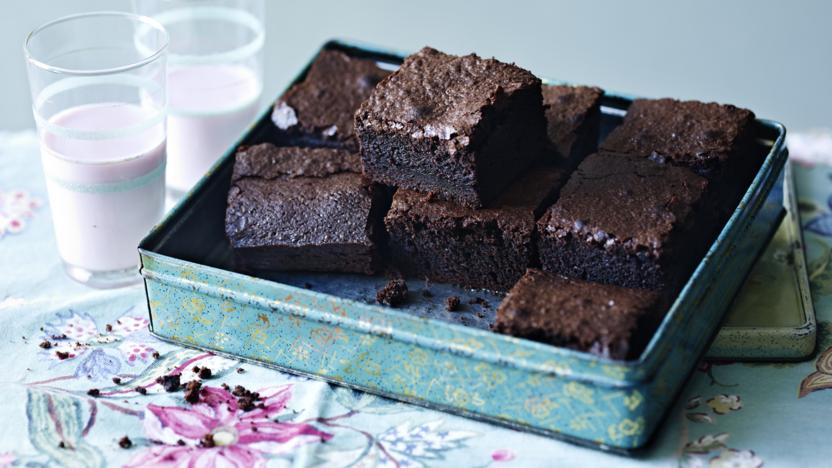

In [0]:
# One more check
from IPython.display import display, Image
Image("/content/drive/My Drive/Food/Food dataset/train/b8.jpg")

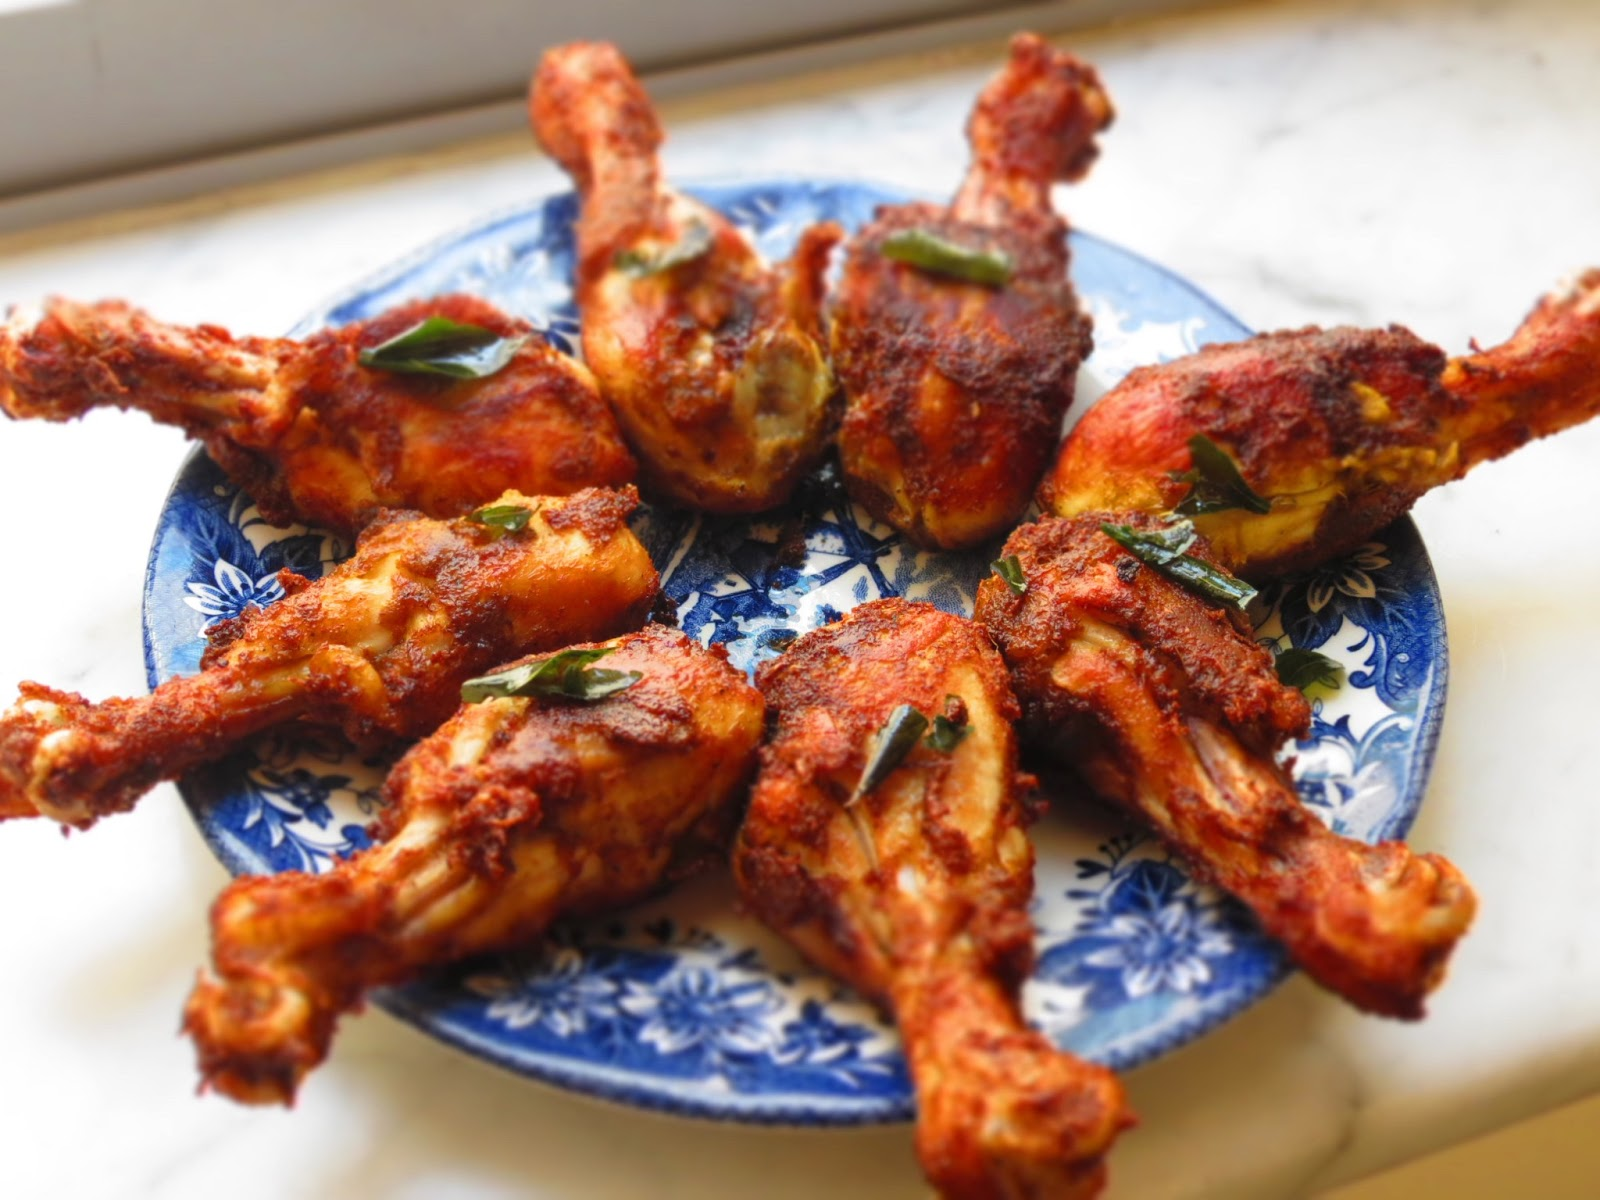

In [0]:
# One more check
Image(filenames[9])

In [0]:
labels_csv["name"][26]

'Cookies'

Since we've now got our training image filepaths in a list, let's prepare our labels.

In [0]:
import numpy as np
labels = labels_csv["name"].to_numpy() 
# labels = np.array(labels) # does same thing as above
labels

array(['Burger', 'Burger', 'Burger', 'Burger', 'Burger', 'Burger',
       'Burger', 'Burger', 'Chicken', 'Chicken', 'Chicken', 'Chicken',
       'Chicken', 'Chicken', 'Chicken', 'Chicken', 'Chole Bhature',
       'Chole Bhature', 'Chole Bhature', 'Chole Bhature', 'Chole Bhature',
       'Chole Bhature', 'Chole Bhature', 'Chole Bhature', 'Cookies',
       'Cookies', 'Cookies', 'Cookies', 'Cookies', 'Cookies', 'Cookies',
       'Cookies', 'Fried fish', 'Fried fish', 'Fried fish', 'Fried fish',
       'Fried fish', 'Fried fish', 'Fried fish', 'Fried fish',
       'French Fries', 'French Fries', 'French Fries', 'French Fries',
       'French Fries', 'French Fries', 'French Fries', 'French Fries',
       'Hot Dog', 'Hot Dog', 'Hot Dog', 'Hot Dog', 'Hot Dog', 'Hot Dog',
       'Hot Dog', 'Hot Dog', 'Jalebi', 'Jalebi', 'Jalebi', 'Jalebi',
       'Jalebi', 'Jalebi', 'Jalebi', 'Jalebi', 'Pani-Puri', 'Pani-Puri',
       'Pani-Puri', 'Pani-Puri', 'Pani-Puri', 'Pani-Puri', 'Pani-Puri',
       'Pan

In [0]:
len(labels)

240

In [0]:
# Finding the unique label values
unique_food = np.unique(labels)
len(unique_food)

30

In [0]:
unique_food

array(['Burger', 'Chicken', 'Chole Bhature', 'Cookies', 'Dounuts',
       'French Fries', 'Fried fish', 'Hot Dog', 'Jalebi', 'Omelette',
       'Pani-Puri', 'Pizza', 'Rasgulla', 'Starbucks Beverage',
       'Strawberry', 'Waffles', 'Wine', 'brownie', 'cake', 'fried rice',
       'fries', 'ice cream', 'idli', 'momos', 'noodles', 'pasta',
       'samosa', 'sandwich', 'spring rolls', 'sushi'], dtype=object)

In [0]:
# Turning a single label into an array of booleans
print(labels[0])
labels[0] == unique_food

Burger


array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [0]:
# Turning every label into a boolean array
boolean_labels = [label == unique_food for label in labels]
boolean_labels[:2]

[array([ True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([ True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False])]

In [0]:
# Example: Turning boolean array into integers
print(labels[0]) # original label
print(np.where(unique_food == labels[0])) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

Burger
(array([0]),)
0
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [0]:
print(labels[2])
print(boolean_labels[2].astype(int))

Burger
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [0]:
boolean_labels[:2]

[array([ True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([ True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False])]

In [0]:
filenames[:10]

['/content/drive/My Drive/Food/Food dataset/train/photo-1542820242-dd9053219a22.jpg',
 '/content/drive/My Drive/Food/Food dataset/train/photo-1548946522-4a313e8972a4.jpg',
 '/content/drive/My Drive/Food/Food dataset/train/photo-1549892898-79ac97b31fb2.jpg',
 '/content/drive/My Drive/Food/Food dataset/train/photo-1551987840-f62d9c74ae78.jpg',
 '/content/drive/My Drive/Food/Food dataset/train/photo-1559067933-0293effe6133.jpg',
 '/content/drive/My Drive/Food/Food dataset/train/photo-1560130803-aaadb4bc913e.jpg',
 '/content/drive/My Drive/Food/Food dataset/train/photo-1565169609627-4b848c72c614.jpg',
 '/content/drive/My Drive/Food/Food dataset/train/photo-1583812323897-998e6927b5ea.jpg',
 '/content/drive/My Drive/Food/Food dataset/train/1f035a2bc93f5a63b9b70545a57bc8d5.jpg',
 '/content/drive/My Drive/Food/Food dataset/train/5926b90aec07f20b008f2163.jpg']

In [0]:
# Setup X & y variables
X = filenames
y = boolean_labels

In [0]:
len(filenames)

240

In [0]:
# Setting number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}

In [0]:
# Let's split our data into train and validation sets(here we go again)
from sklearn.model_selection import train_test_split

# Split them into training and validation of total size NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(192, 192, 48, 48)

In [0]:
# Let's have a glance at the training data
X_train[:5], y_train[:2]

(['/content/drive/My Drive/Food/Food dataset/train/san6.jpg',
  '/content/drive/My Drive/Food/Food dataset/train/Jalebi-678x381.jpg',
  '/content/drive/My Drive/Food/Food dataset/train/fr7.jpg',
  '/content/drive/My Drive/Food/Food dataset/train/id5.jpg',
  '/content/drive/My Drive/Food/Food dataset/train/fr10.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
          True, False, False]),
  array([False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False])])

# **Preprocessing Images (turning images into Tenso)**


